# Test Script

In [ ]:
pip install selenium #install selenium python package

In [ ]:
#HTML files for human-readable presentation of results
pip install html-testRunner

In [7]:
import time
import unittest
import HtmlTestRunner
from selenium import webdriver
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from unittest_prettify.colorize import (
    colorize,
    GREEN,
    RED,
)

options = Options()
options.add_argument('--incognito')
options.add_argument('--start-maximized')


@colorize(color=RED)
class Login(unittest.TestCase):

    def __init__(self, methodName: str = "runTest") -> None:
        self.url = 'http://localhost/Moshi/view/home.php'
        super().__init__(methodName)

    def setUp(self):
        self.browser = webdriver.Edge(options=options)

    def tearDown(self) -> None:
        self.browser.quit()
        return super().tearDown()

    def test_auth_check(self):
        self.browser.get(self.url)
        self.assertIn('Login', self.browser.title)

    def test_login(self):
        self.browser.get(self.url)
        username = self.browser.find_element(By.ID, value='id')
        password = self.browser.find_element(By.ID, value='password')
        login_button = self.browser.find_element(By.ID, value='login-button')
        username.send_keys('28905')
        password.send_keys('1111')
        login_button.click()

#         p = WebDriverWait(self.browser, 10).until(
#             EC.presence_of_element_located((By.ID, 'welcome-msg'))
#         )
        #self.assertIn('ANISUL KHAN', p.text)
    
        val = self.browser.find_element(By.ID, "name")
        self.assertTrue(val.text, "No results found")

    def test_logout(self):
        self.test_login()
        logout_button = self.browser.find_element(By.LINK_TEXT, 'Sign Out')
        logout_button.click()
        self.assertIn('Login', self.browser.title)

    def test_forgot_password(self):
        self.browser.get(self.url)
        forgot_password = self.browser.find_element(
            By.PARTIAL_LINK_TEXT, 'Forget')
        forgot_password.click()
        input_id = self.browser.find_element(By.ID, value='id')
        input_id.send_keys('28905')
        submit_button = self.browser.find_element(By.ID, 'find-password')
        submit_button.click()

        p_id = WebDriverWait(self.browser, 10).until(
            EC.presence_of_element_located((By.ID, 'found'))
        )

        self.assertIn('1111', p_id.text)
        
    def test_Admin_Registration(self):
        self.browser.get(self.url)
        link = self.browser.find_element(By.LINK_TEXT, "Register")
        link.click()
        time.sleep(2)
        
        ID = self.browser.find_element(By.ID, "id")
        name = self.browser.find_element(By.ID, "name")
        mail = self.browser.find_element(By.ID, "mail")
        password = self.browser.find_element(By.ID, "password")
        cpassword = self.browser.find_element(By.ID, "cpassword")
        
        gender_male = self.browser.find_elements(By.XPATH, "//input[@name='gender' and @value='Male']")[0]
        
        register_button = self.browser.find_element(By.NAME, "Register")


        ID.send_keys("25466")
        name.send_keys("LKJ Pop")
        mail.send_keys("ywtqet657@gmail.com")
        password.send_keys("1111")
        cpassword.send_keys("1111")
        gender_male.click()

        time.sleep(1)
        register_button.click()
        time.sleep(1)

        val = self.browser.find_element(By.ID, "found")
        self.assertTrue(val.text, "No results found")
        
    def test_ADD_Notice(self):
        
        self.browser.get(self.url)
        self.test_login()
        link = self.browser.find_element(By.LINK_TEXT, "Notices")
        link.click()
        time.sleep(1)
        
        link = self.browser.find_element(By.NAME, "addNotice")
        link.click()
        time.sleep(1)
        
        title = self.browser.find_element(By.ID, "title")
        date = self.browser.find_element(By.ID, "date")
        description = self.browser.find_element(By.ID, "description")
        
        add_button = self.browser.find_element(By.ID, "add")


        title.send_keys("Random ANy")
        date.send_keys("28.03.2023")
        description.send_keys("It is to notify all concerned that the University would remain closed on Sunday, March 26, 2023, due to Independence Day 2023.")

        time.sleep(1)
        add_button.click()
        time.sleep(1)

        val = self.browser.find_element(By.ID, "found")
        self.assertTrue(val.text, "No results found")
    
    def test_Delete_Student(self):
        
        self.browser.get(self.url)
        self.test_login()
        link = self.browser.find_element(By.LINK_TEXT, "Students")
        link.click()
        time.sleep(1)
        
        td_elements = self.browser.find_elements(By.XPATH, '//table[@id="stdTable"]/tbody/tr/td[@id="delete"]')
        delete_td = td_elements[1]
        delete_td.click()
        time.sleep(1)

        val = self.browser.find_element(By.ID, "found")
        self.assertTrue(val.text, "No results found")
    
    def test_Update_Admin_Information(self):
        
        self.browser.get(self.url)
        self.test_login()
        link = self.browser.find_element(By.LINK_TEXT, "Profile")
        link.click()
        time.sleep(1)
        
        link = self.browser.find_element(By.NAME, "modify")
        link.click()
        time.sleep(1)
        
        name_input = self.browser.find_element(By.ID, "name")
        update = self.browser.find_element(By.NAME, "save")
        
        name_input.clear()
        name_input.send_keys("Arab Khan Arif")
        update.click()
        time.sleep(1)

        val = self.browser.find_element(By.ID, "found")
        self.assertTrue(val.text, "No results found")
        
    def test_Upload_File(self):
        
        self.browser.get(self.url)
        self.test_login()
        link = self.browser.find_element(By.LINK_TEXT, "Forms")
        link.click()
        time.sleep(1)
        
        file_input = self.browser.find_element(By.NAME, "uploadedFile")
        upload = self.browser.find_element(By.NAME, "upload")

        file_input.send_keys("H:/Downloads/Course_Adjustment_Form.pdf")
        time.sleep(1)
        upload.click()
        
        val = self.browser.find_element(By.ID, "found")
        self.assertTrue(val.text, "No results found")
        
       
    def test_search(self):
        self.test_login()

        search_a = WebDriverWait(self.browser, 10).until(
            EC.presence_of_element_located((By.LINK_TEXT, 'Search'))
        )

        search_a.click()

        search_input = WebDriverWait(self.browser, 10).until(
            EC.presence_of_element_located((By.ID, 'id'))
        )

        search_input.send_keys('8888')

        p = WebDriverWait(self.browser, 10).until(
            EC.presence_of_element_located((By.ID, 'msg')))

        self.assertNotIn('not', p.text)


if __name__ == '__main__':
    #unittest.main(argv=['first-arg-is-ignored'], exit=False)
    unittest.main(testRunner=HtmlTestRunner.HTMLTestRunner(output='test-reports'), argv=['first-arg-is-ignored'], exit=False)




Running tests... 
----------------------------------------------------------------------
 test_ADD_Notice (__main__.Login) ... OK (14.426489)s
 test_Admin_Registration (__main__.Login) ... FAIL (30.302239)s
 test_Delete_Student (__main__.Login) ... OK (30.063996)s
 test_Update_Admin_Information (__main__.Login) ... OK (13.200919)s
 test_Upload_File (__main__.Login) ... OK (11.298747)s
 test_auth_check (__main__.Login) ... OK (6.611105)s
 test_forgot_password (__main__.Login) ... OK (6.952684)s
 test_login (__main__.Login) ... OK (7.435927)s
 test_logout (__main__.Login) ... OK (8.900683)s
 test_search (__main__.Login) ... OK (12.489426)s
 test_search_in_google_com (__main__.PythonOrgSearch) ... OK (11.307481)s

FAIL [30.302239s]: __main__.Login.test_Admin_Registration
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\aksow\AppData\Local\Temp\ipykernel_2712\1983284090.py", line 107, in test_Admin_Registration
    

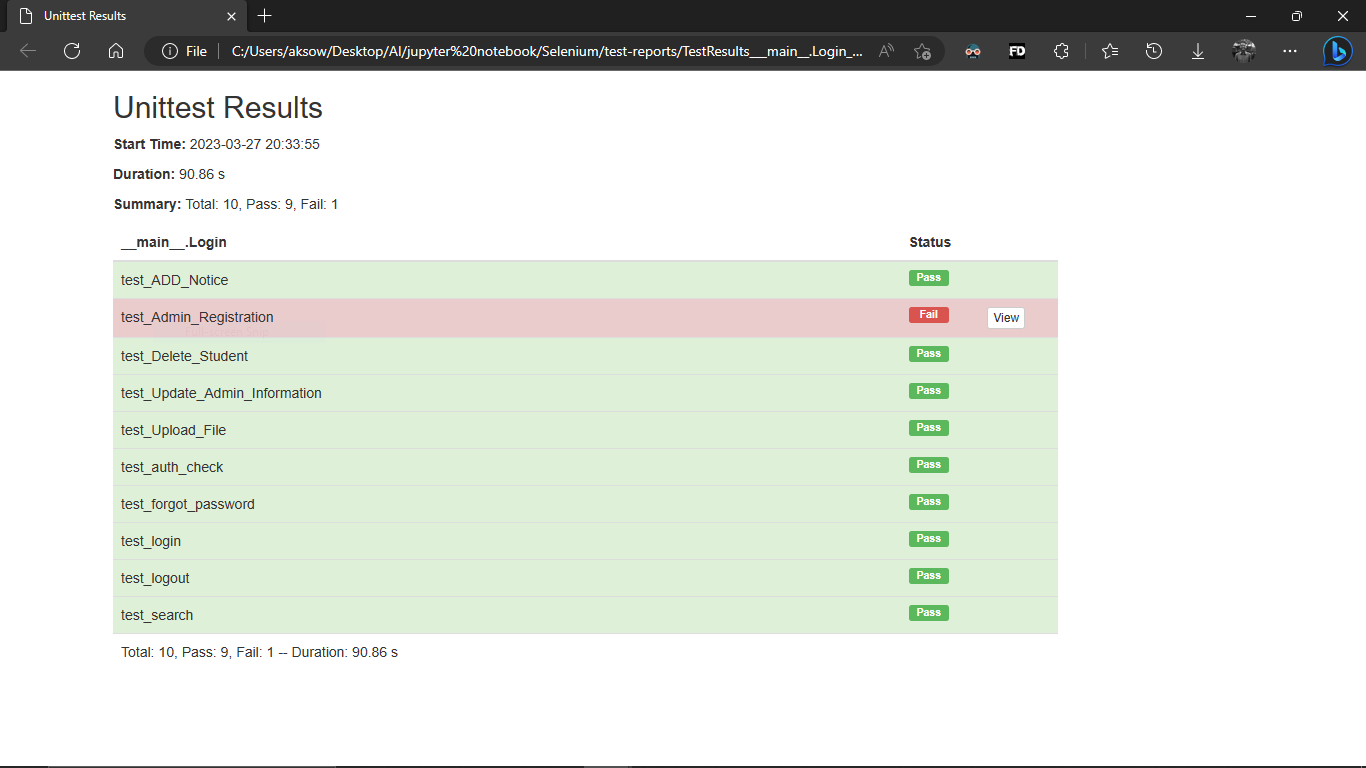